In [912]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In dealing with Missing Values (NaNs), we decided to drop all three columnns with nans: 'waterfront', 'view', 'yr_renovated'. 'Waterfront': 88% (19,075) of observations were zeros & 11% (2,376) were NaNs; 'Yr_renovated': 79% (17,011) were zeros & 18% (3,842) were NaNs; finally, 'View': 90% (19,422) of observations were zeros; only 63 values missing, but we didn't think feature was varied enough to inform model in an meaningful way.  

Decided to leverage 'zipcode'; hence, dropped 'lat' and 'long'.

Dropped 'id' because it wasn't meaningful for our purposes.

Dropped 'date' because it was not meaningfully varied (all dates between 2014 & 2015).

In [913]:
df = df.drop(columns=['waterfront','view', 'yr_renovated', 'lat', 'long', 'id', 'date'], axis=1)

Addressed presence of '?' in 'sqft_basement'; changed the datatype.

In [914]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0').astype(str).astype(float).astype(int)

In [915]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.321108,0.053953,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.297229,0.155670,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.278485,0.507173,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.428660,0.318152,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.015031,0.052946,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,-0.241866,0.489193,-0.059541,0.280102,-0.010722
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,0.168482,-0.361592,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.165843,0.447865,-0.185771,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,-0.051175,0.424037,-0.261570,0.731767,0.195077
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.168482,0.165843,-0.051175,1.000000,-0.130085,0.073271,0.199288,0.015885


Dropped 'sqft_above', 'bathrooms' & 'sqft_living15' for colinearity with 'sqft_living'.

In [916]:
df_dropped = df.drop(columns=['sqft_above', 'sqft_living15', 'bathrooms'], axis=1)

In [917]:
df_dropped = df.drop(columns=['condition'])

Dropped outliers for different independent variables.

In [918]:
indexNames = df_dropped[df_dropped['sqft_living'] >= 8000].index
df_dropped.drop(indexNames, inplace=True)
df_dropped.shape

(21587, 13)

In [919]:
indexNames2 = df_dropped[df_dropped['bedrooms'] >= 9].index
df_dropped.drop(indexNames2, inplace=True)
df_dropped.shape

(21576, 13)

In [920]:
indexNames3 = df_dropped[df_dropped['sqft_lot'] > 1000000].index
df_dropped.drop(indexNames3, inplace=True)
df_dropped.shape

(21572, 13)

In [848]:
#indexNames4 = df_dropped[df_dropped['bathrooms'] >= 6.00].index
#df_dropped.drop(indexNames4, inplace=True)
#df_dropped.shape

(21563, 13)

In [921]:
indexNames5 = df_dropped[df_dropped['floors'] > 3.0].index
df_dropped.drop(indexNames5, inplace=True)
df_dropped.shape

(21565, 13)

In [682]:
#indexNames6 = df_dropped[df_dropped['sqft_living15'] > 6000].index
#df_dropped.drop(indexNames6, inplace=True)
#df_dropped.shape

In [922]:
indexNames7 = df_dropped[df_dropped['sqft_lot'] > 900000].index
df_dropped.drop(indexNames7, inplace=True)
df_dropped.shape

(21562, 13)

In [276]:
#import numpy as np
#df_dropped['log_sqft_living'] = np.log2(df_dropped['sqft_living'])
#df_dropped.drop(columns=['sqft_living'], axis=1, inplace=True)
#df_dropped.head()

,price,bedrooms,sqft_lot,floors,yr_built,gd_3,gd_4,gd_5,gd_6,gd_7,...,zp_98148,zp_98155,zp_98166,zp_98168,zp_98177,zp_98178,zp_98188,zp_98198,zp_98199,log_sqft_living
0,221900.0,3,5650,1.0,1955,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,10.204571
1,538000.0,3,7242,2.0,1951,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.327553
2,180000.0,2,10000,1.0,1933,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9.588715
3,604000.0,4,5000,1.0,1965,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.936638
4,510000.0,3,8080,1.0,1987,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.714246


In [923]:
grade_dummies = pd.get_dummies(df_dropped['grade'], prefix="gd")
zip_dummies = pd.get_dummies(df_dropped['zipcode'], prefix="zp")
#condition_dummies = pd.get_dummies(df_dropped['condition'], prefix="cond")

In [924]:
df_dropped = df_dropped.drop(['grade', 'zipcode'], axis=1)

In [925]:
df_dropped = pd.concat([df_dropped, grade_dummies, zip_dummies], axis=1)
df_dropped.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,zp_98146,zp_98148,zp_98155,zp_98166,zp_98168,zp_98177,zp_98178,zp_98188,zp_98198,zp_98199
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,1800,...,0,0,0,0,0,0,0,0,0,0


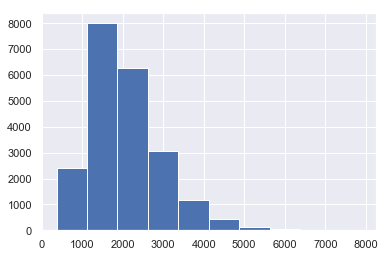

In [828]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(df_dropped['sqft_living'])
plt.show()

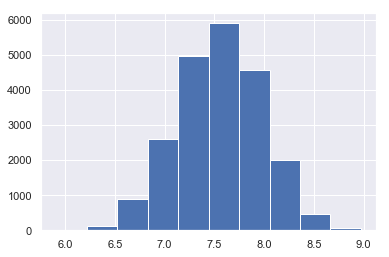

In [926]:
df_dropped['log_sqft_living'] = np.log(df_dropped['sqft_living'])

plt.hist(df_dropped['log_sqft_living'])
plt.show()

In [927]:
df_dropped.drop(columns=['sqft_living'], axis=1, inplace=True)

In [856]:
df_dropped.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,zp_98148,zp_98155,zp_98166,zp_98168,zp_98177,zp_98178,zp_98188,zp_98198,zp_98199,log_sqft_living
0,221900.0,3,1.00,5650,1.0,1180,0,1955,1340,5650,...,0,0,0,0,0,1,0,0,0,7.073270
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1690,7639,...,0,0,0,0,0,0,0,0,0,7.851661
2,180000.0,2,1.00,10000,1.0,770,0,1933,2720,8062,...,0,0,0,0,0,0,0,0,0,6.646391
3,604000.0,4,3.00,5000,1.0,1050,910,1965,1360,5000,...,0,0,0,0,0,0,0,0,0,7.580700
4,510000.0,3,2.00,8080,1.0,1680,0,1987,1800,7503,...,0,0,0,0,0,0,0,0,0,7.426549


In [256]:
df_dropped['sqft_living'].describe()

count    21578.000000
mean      2076.506673
std        902.484458
min        370.000000
25%       1427.750000
50%       1910.000000
75%       2550.000000
max       7880.000000
Name: sqft_living, dtype: float64

In [259]:
import numpy as np
df_dropped['log_sqft_living'] = np.log(df_dropped['sqft_living'])
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,gd_3,gd_4,gd_5,gd_6,...,zp_98148,zp_98155,zp_98166,zp_98168,zp_98177,zp_98178,zp_98188,zp_98198,zp_98199,log_sqft_living
0,221900.0,3,1180,5650,1.0,1955,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7.073270
1,538000.0,3,2570,7242,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.851661
2,180000.0,2,770,10000,1.0,1933,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.646391
3,604000.0,4,1960,5000,1.0,1965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.580700
4,510000.0,3,1680,8080,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.426549


In [261]:
import pandas as pd
from sklearn import preprocessing

#float_array = df_dropped['sqft_living'].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(float_array)
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized.head()

In [928]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
formula = "price ~ sqft_living+floors+bedrooms+sqft_living15"
model = ols(formula= formula, data=df_dropped).fit()

In [929]:
outcome = 'price'
predictors = df_dropped.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [930]:
model = ols(formula= formula, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     921.0
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:20:19   Log-Likelihood:            -2.8900e+05
No. Observations:               21562   AIC:                         5.782e+05
Df Residuals:                   21472   BIC:                         5.789e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.233e+06   1.29e+05     25.108      0.000    2.98e+06    3.49e+06
bedrooms        -1.537e+04   1689.694     -9.095      0.000   -1.87e+04   -1.21e+04
bathrooms        4.103e+04   2630.254     15.600      0.000    3.59e+04    4.62e+04
sqft_lot            0.3049      0.049      6.242      0.000       0.209       0.401
floors          -1.568e+04   3188.776     -4.916      0.000   -2.19e+04   -9424.999
sqft_above        195.5924      5.601     34.919      0.000     184.614     206.571
sqft_basement     181.2519      5.919     30.624      0.000     169.651     192.853
yr_built        -1217.8721     59.585    -20.439      0.000   -1334.663   -1101.081
sqft_living15      41.0656      2.877     14.274      0.000      35.426      46.705
sqft_lot15         -0.1990      0.067     -2.987      0.003      -0.330      -0.068
gd_3             7.416e+04   1.48e+05      0.502      0.616   -2.16e+05    3.64e+05
gd_4            -2.931e+04   3.32e+04     -0.882      0.378   -9.45e+04    3.58e+04
gd_5            -2.075e+04   2.05e+04     -1.010      0.313    -6.1e+04    1.95e+04
gd_6            -6940.6397   1.93e+04     -0.360      0.719   -4.48e+04    3.09e+04
gd_7             2.163e+04      2e+04      1.082      0.279   -1.76e+04    6.08e+04
gd_8             6.213e+04   2.04e+04      3.044      0.002    2.21e+04    1.02e+05
gd_9             1.476e+05   2.06e+04      7.154      0.000    1.07e+05    1.88e+05
gd_10            2.793e+05   2.07e+04     13.482      0.000    2.39e+05     3.2e+05
gd_11            4.761e+05   2.13e+04     22.316      0.000    4.34e+05    5.18e+05
gd_12            8.691e+05   2.58e+04     33.725      0.000    8.19e+05     9.2e+05
gd_13             1.36e+06    5.3e+04     25.638      0.000    1.26e+06    1.46e+06
zp_98001        -1.465e+05   8862.584    -16.533      0.000   -1.64e+05   -1.29e+05
zp_98002        -1.276e+05   1.16e+04    -10.972      0.000    -1.5e+05   -1.05e+05
zp_98003        -1.566e+05   9844.519    -15.903      0.000   -1.76e+05   -1.37e+05
zp_98004          5.73e+05   9313.867     61.519      0.000    5.55e+05    5.91e+05
zp_98005         1.293e+05   1.25e+04     10.328      0.000    1.05e+05    1.54e+05
zp_98006         9.752e+04   7721.756     12.630      0.000    8.24e+04    1.13e+05
zp_98007         8.761e+04   1.36e+04      6.462      0.000     6.1e+04    1.14e+05
zp_98008         1.422e+05   9739.102     14.599      0.000    1.23e+05    1.61e+05
zp_98010        -7.981e+04   1.62e+04     -4.920      0.000   -1.12e+05    -4.8e+04
zp_98011        -3.114e+04   1.17e+04     -2.662      0.008   -5.41e+04   -8211.184
zp_98014        -5.388e+04    1.5e+04     -3.594      0.000   -8.33e+04   -2.45e+04
zp_98019        -6.034e+04    1.2e+04     -5.026      0.000   -8.39e+04   -3.68e+04
zp_98022        -1.228e+05   1.09e+04    -11.223      0.000

In [931]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_dropped, test_size=0.20)

In [861]:
len(train)

17242

In [862]:
len(test)

4311

In [932]:
outcome = 'price'
predictors = train.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [933]:
model = ols(formula= formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     733.5
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:20:34   Log-Likelihood:            -2.3121e+05
No. Observations:               17249   AIC:                         4.626e+05
Df Residuals:                   17159   BIC:                         4.633e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         3.18e+06   1.45e+05     21.987      0.000     2.9e+06    3.46e+06
bedrooms        -1.325e+04   1885.249     -7.028      0.000   -1.69e+04   -9553.772
bathrooms        3.974e+04   2938.657     13.524      0.000     3.4e+04    4.55e+04
sqft_lot            0.2932      0.055      5.343      0.000       0.186       0.401
floors          -1.855e+04   3576.743     -5.187      0.000   -2.56e+04   -1.15e+04
sqft_above        196.0693      6.250     31.372      0.000     183.819     208.320
sqft_basement     174.9947      6.599     26.519      0.000     162.060     187.929
yr_built        -1204.3508     67.121    -17.943      0.000   -1335.914   -1072.788
sqft_living15      39.2880      3.225     12.182      0.000      32.966      45.610
sqft_lot15         -0.2001      0.073     -2.723      0.006      -0.344      -0.056
gd_3             8.669e+04   1.48e+05      0.585      0.559   -2.04e+05    3.77e+05
gd_4            -5796.3614   3.59e+04     -0.161      0.872   -7.62e+04    6.46e+04
gd_5            -2.078e+04   2.23e+04     -0.933      0.351   -6.44e+04    2.29e+04
gd_6            -4350.1718   2.08e+04     -0.209      0.834   -4.51e+04    3.64e+04
gd_7             2.396e+04   2.16e+04      1.109      0.267   -1.84e+04    6.63e+04
gd_8             6.476e+04   2.21e+04      2.930      0.003    2.14e+04    1.08e+05
gd_9              1.49e+05   2.24e+04      6.667      0.000    1.05e+05    1.93e+05
gd_10             2.94e+05   2.25e+04     13.073      0.000     2.5e+05    3.38e+05
gd_11            4.809e+05   2.32e+04     20.704      0.000    4.35e+05    5.26e+05
gd_12            9.216e+05   2.83e+04     32.592      0.000    8.66e+05    9.77e+05
gd_13             1.19e+06   6.95e+04     17.122      0.000    1.05e+06    1.33e+06
zp_98001        -1.472e+05      1e+04    -14.673      0.000   -1.67e+05   -1.28e+05
zp_98002        -1.317e+05   1.32e+04    -10.017      0.000   -1.57e+05   -1.06e+05
zp_98003        -1.562e+05   1.09e+04    -14.275      0.000   -1.78e+05   -1.35e+05
zp_98004         5.759e+05   1.02e+04     56.275      0.000    5.56e+05    5.96e+05
zp_98005         1.197e+05   1.39e+04      8.605      0.000    9.25e+04    1.47e+05
zp_98006         8.968e+04   8719.091     10.286      0.000    7.26e+04    1.07e+05
zp_98007         9.028e+04   1.54e+04      5.849      0.000       6e+04    1.21e+05
zp_98008         1.371e+05   1.09e+04     12.578      0.000    1.16e+05    1.58e+05
zp_98010        -8.034e+04   1.91e+04     -4.208      0.000   -1.18e+05   -4.29e+04
zp_98011        -3.401e+04   1.29e+04     -2.628      0.009   -5.94e+04   -8641.449
zp_98014         -5.04e+04   1.62e+04     -3.105      0.002   -8.22e+04   -1.86e+04
zp_98019        -6.264e+04   1.31e+04     -4.785      0.000   -8.83e+04    -3.7e+04
zp_98022        -1.279e+05   1.26e+04    -10.147      0.000

In [934]:
outcome = 'price'
predictors = test.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [935]:
model = ols(formula= formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:20:43   Log-Likelihood:                -57708.
No. Observations:                4313   AIC:                         1.156e+05
Df Residuals:                    4224   BIC:                         1.162e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.392e+06    2.8e+05     12.107      0.000    2.84e+06    3.94e+06
bedrooms        -2.334e+04   3820.961     -6.107      0.000   -3.08e+04   -1.58e+04
bathrooms        4.527e+04   5936.680      7.626      0.000    3.36e+04    5.69e+04
sqft_lot            0.3707      0.107      3.451      0.001       0.160       0.581
floors          -6286.8692   7038.228     -0.893      0.372   -2.01e+04    7511.757
sqft_above        200.1722     12.704     15.757      0.000     175.266     225.078
sqft_basement     211.0012     13.453     15.685      0.000     184.627     237.376
yr_built        -1232.3856    129.758     -9.498      0.000   -1486.779    -977.992
sqft_living15      46.1195      6.424      7.179      0.000      33.525      58.713
sqft_lot15         -0.1451      0.162     -0.899      0.369      -0.462       0.172
gd_3             -1.02e-08   6.83e-10    -14.931      0.000   -1.15e-08   -8.86e-09
gd_4            -1.059e+05   7.64e+04     -1.386      0.166   -2.56e+05    4.39e+04
gd_5             2.477e+04   3.52e+04      0.704      0.481   -4.42e+04    9.37e+04
gd_6             2.942e+04   3.22e+04      0.914      0.361   -3.37e+04    9.25e+04
gd_7             6.022e+04   3.41e+04      1.768      0.077   -6539.023    1.27e+05
gd_8             1.004e+05   3.52e+04      2.855      0.004    3.15e+04    1.69e+05
gd_9             1.917e+05   3.57e+04      5.378      0.000    1.22e+05    2.62e+05
gd_10            2.708e+05   3.54e+04      7.645      0.000    2.01e+05     3.4e+05
gd_11            5.048e+05   3.67e+04     13.746      0.000    4.33e+05    5.77e+05
gd_12            7.065e+05   4.88e+04     14.465      0.000    6.11e+05    8.02e+05
gd_13            1.609e+06   7.94e+04     20.257      0.000    1.45e+06    1.76e+06
zp_98001        -1.437e+05   1.88e+04     -7.648      0.000    -1.8e+05   -1.07e+05
zp_98002        -1.115e+05   2.47e+04     -4.508      0.000    -1.6e+05    -6.3e+04
zp_98003        -1.577e+05   2.24e+04     -7.034      0.000   -2.02e+05   -1.14e+05
zp_98004          5.42e+05   2.25e+04     24.120      0.000    4.98e+05    5.86e+05
zp_98005          1.59e+05   2.86e+04      5.556      0.000    1.03e+05    2.15e+05
zp_98006         1.353e+05   1.66e+04      8.163      0.000    1.03e+05    1.68e+05
zp_98007         7.968e+04   2.82e+04      2.830      0.005    2.45e+04    1.35e+05
zp_98008         1.589e+05   2.16e+04      7.368      0.000    1.17e+05    2.01e+05
zp_98010        -8.008e+04   3.06e+04     -2.617      0.009    -1.4e+05   -2.01e+04
zp_98011        -1.592e+04   2.72e+04     -0.585      0.558   -6.92e+04    3.74e+04
zp_98014        -8.747e+04   3.93e+04     -2.225      0.026   -1.65e+05   -1.04e+04
zp_98019        -4.767e+04   3.02e+04     -1.577      0.115   -1.07e+05    1.16e+04
zp_98022        -1.094e+05    2.2e+04     -4.982      0.000

In [784]:
df_dropped.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,yr_built,sqft_lot15,gd_3,gd_4,...,zp_98178,zp_98188,zp_98198,zp_98199,cond_1,cond_2,cond_3,cond_4,cond_5,log_sqft_living
0,221900.0,3,1.00,5650,1.0,0,1955,5650,0,0,...,1,0,0,0,0,0,1,0,0,7.073270
1,538000.0,3,2.25,7242,2.0,400,1951,7639,0,0,...,0,0,0,0,0,0,1,0,0,7.851661
2,180000.0,2,1.00,10000,1.0,0,1933,8062,0,0,...,0,0,0,0,0,0,1,0,0,6.646391
3,604000.0,4,3.00,5000,1.0,910,1965,5000,0,0,...,0,0,0,0,0,0,0,0,1,7.580700
4,510000.0,3,2.00,8080,1.0,0,1987,7503,0,0,...,0,0,0,0,0,0,1,0,0,7.426549
